# Etude de la détection automatique de caractéristiques sur un signal audio
![ISEN Lille](src/imgs/isen.jpg)

# Support de tests

Ce Notebook est une version allégée du **Compte-rendu**.
Elle permet d'effectuer rapidement les tests en chargeant directement tous les fichiers nécessaires.

In [1]:
%%html
<script>
IPython.OutputArea.prototype._should_scroll = lines => { return false }  
</script>
<style>
.output_wrapper button.btn.btn-default, .output_wrapper .ui-dialog-titlebar { display: none; }
.output_stderr { display: none; }
.ui-resizable { pointer-events:none; }
</style>

In [2]:
# Chemin vers les bibliothèques Python
lib_path = "C:\Program Files\Python36\Lib\site-packages"

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%matplotlib notebook
%run -i bin/imports.py
%run -i bin/imports_pyaudio.py
%run -i bin/adc.py
%run -i bin/bandpass.py
%run -i bin/compare.py
%run -i bin/compute.py
%run -i bin/cut.py
%run -i bin/drc.py
%run -i bin/drcz.py
%run -i bin/energies.py
%run -i bin/energy.py
%run -i bin/gen_data.py
%run -i bin/gen_filtered.py
%run -i bin/gen_filters.py
%run -i bin/gen_sine.py
%run -i bin/learning.py
%run -i bin/live_record.py
%run -i bin/plot_data.py
%run -i bin/plot_datagram.py
%run -i bin/plot_dbfs.py
%run -i bin/plot_energies.py
%run -i bin/plot_fft.py
%run -i bin/plot_filtered.py
%run -i bin/plot_formants.py
%run -i bin/plot_freqz.py
%run -i bin/plot_specamp.py
%run -i bin/plot_specgram.py
%run -i bin/similar.py
%run -i bin/similarities.py
%run -i bin/state_at.py
%run -i bin/to1D.py

ERROR:root:File `'bin/plot_fft.py'` not found.


# Zone de tests

Toutes les fonctions implémentées sont accessibles dans les cellules ci-dessous.

Préparation des fichiers à traiter...
   150 fichiers d'apprentissage récupérés
    75 fichiers de test récupérés
     3 valeurs (chien, chat, loup)

Acquisition des données...

C:\ProgramUser\Anaconda\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


   150 fichiers d'apprentissage traités
    75 fichiers de test traités

Apprentissage...
   150 fichiers utilisés
    75 prédictions

Rapport détaillé du classificateur :
             precision    recall  f1-score   support

       chat       0.66      0.84      0.74        25
      chien       0.88      0.56      0.68        25
       loup       0.93      1.00      0.96        25

avg / total       0.82      0.80      0.79        75



<IPython.core.display.Javascript object>


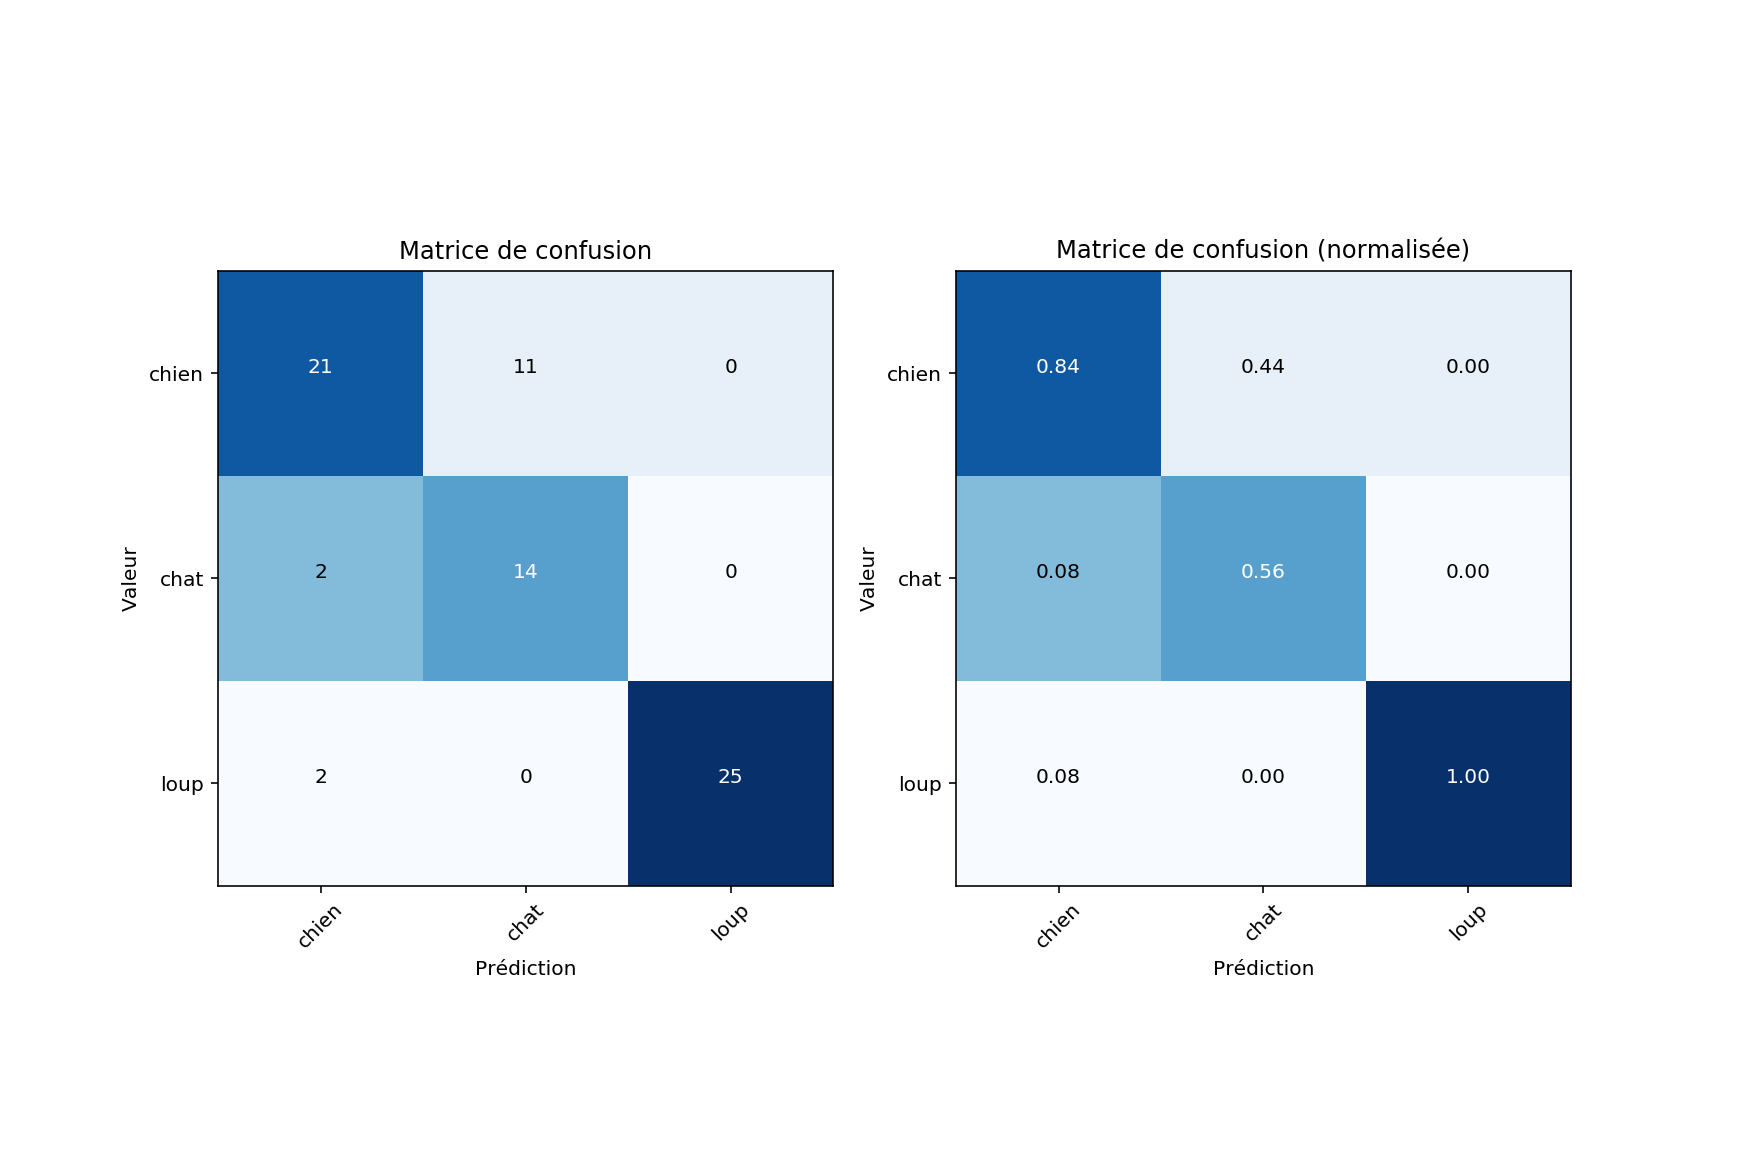

In [4]:
%run -i bin/learning.py
learning(
    learn=["chien{i:02}", "chat{i:02}", "loup{i:02}"], learn_i=[50, 50, 50], 
    test=["chien{i:02}", "chat{i:02}", "loup{i:02}"], test_i=[25, 25, 25], 
    options={"fmin":300, "fmax":22000, "nb_filters":32, "q":10, "n":3, "time_res":0.05, "amp_res":3},
    neurons=(100)
);

Préparation des fichiers à traiter...
    80 fichiers d'apprentissage récupérés
    18 fichiers de test récupérés
     2 valeurs (f, m)

Acquisition des données...    80 fichiers d'apprentissage traités
    18 fichiers de test traités

Apprentissage...
    80 fichiers utilisés
    18 prédictions

Rapport détaillé du classificateur :
             precision    recall  f1-score   support

          f       0.78      0.78      0.78         9
          m       0.78      0.78      0.78         9

avg / total       0.78      0.78      0.78        18



C:\ProgramUser\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<IPython.core.display.Javascript object>


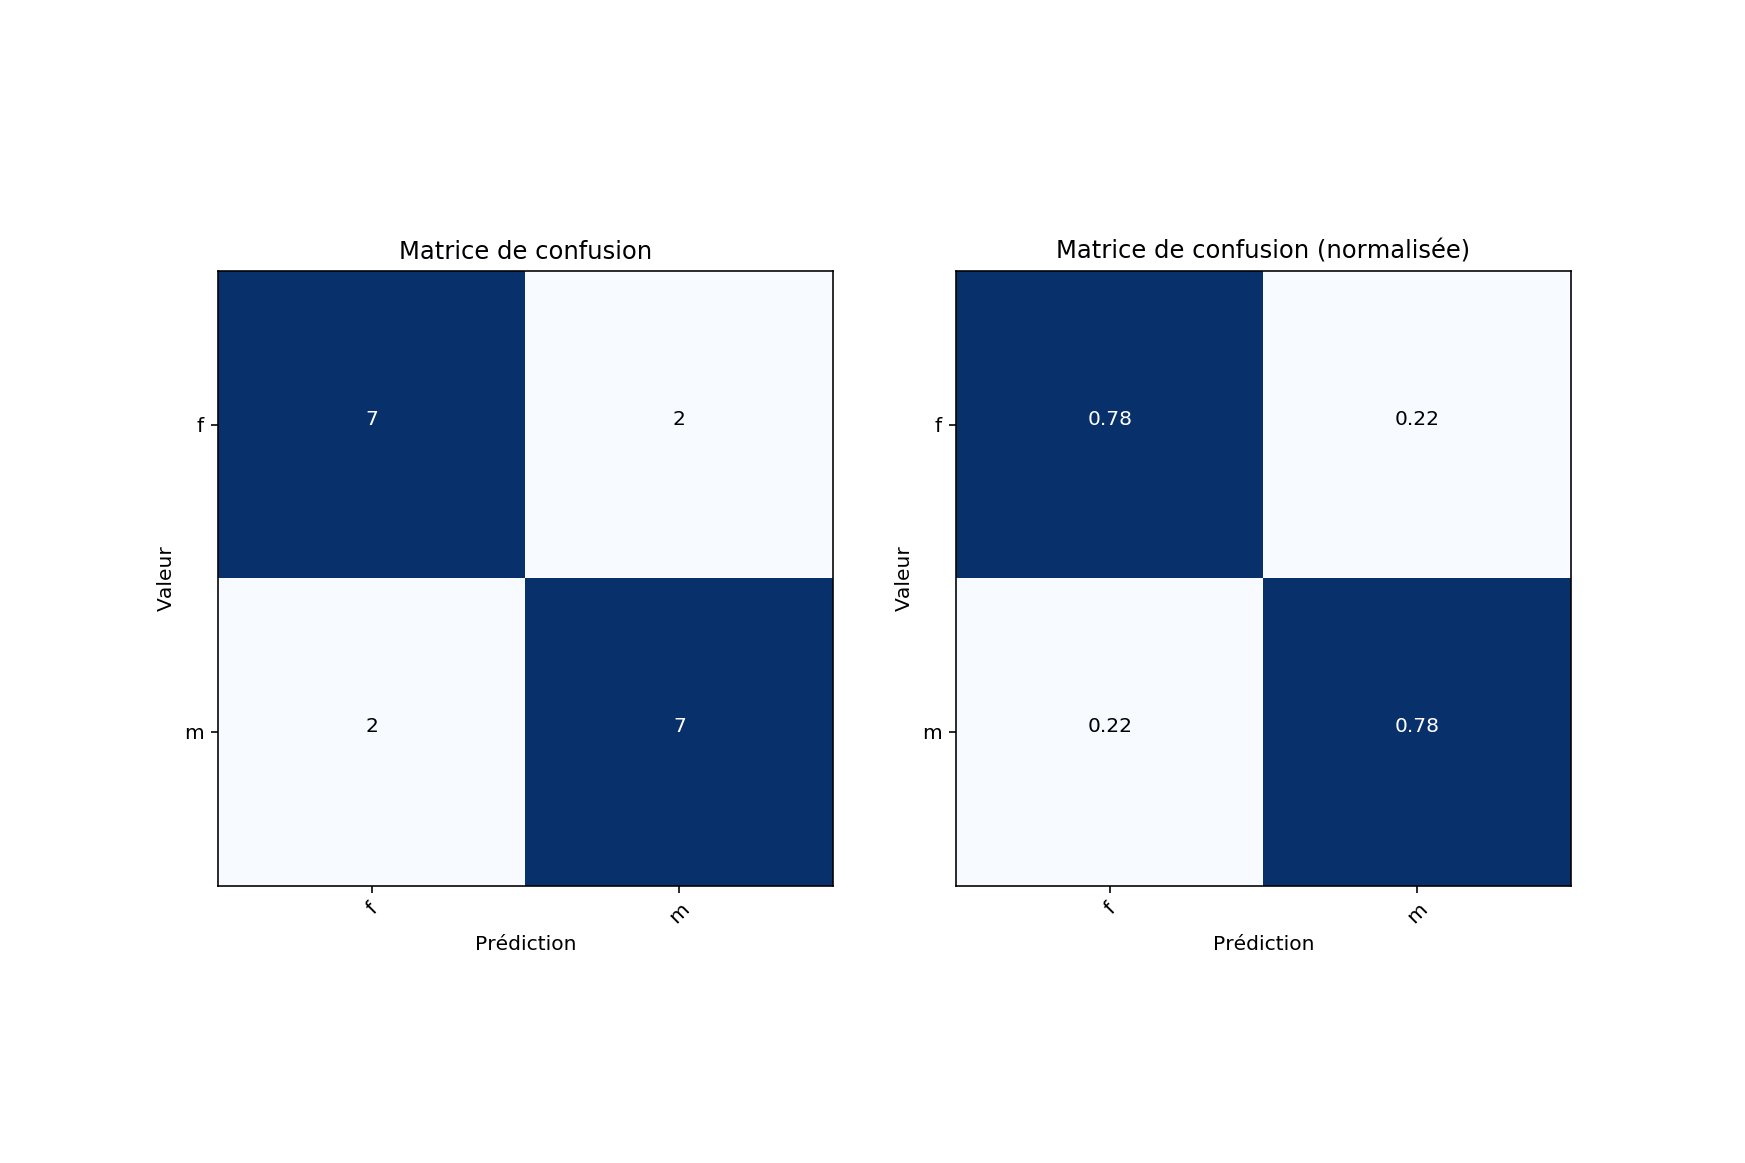

In [5]:
%run -i bin/learning.py
la = learning(
    learn=["f1_{i:02}", "m1_{i:02}"], learn_i=[40, 40], 
    test=["f1_4{i}", "m1_4{i}"], test_i=[9, 9], 
    options={"fmin":300, "fmax":12000, "nb_filters":16, "q":2, "n":3, "time_res":0.05, "amp_res":2, "adc_res":1},
    neurons=(100)
);